## Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio Random Forest de Regresión
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
# "Librerías" Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
import pickle
from IPython.display import display, Markdown 

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 10)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns= 'Unnamed: 0')
df.head()

MS_SubClass                 MS_Zoning  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities Lot_Config Land_Slope Neighborhood Condition_1  \
0          Lvl    AllPub     Corner        Gtl   North_Ames        Norm   
1          Lvl    AllPub     Inside        Gtl   North_Ames       Feedr   
2          Lvl    AllPub     Corner        Gtl   North_Ames        Norm   
3          Lvl    AllPub     Corner        Gtl   North_Ames        Norm   
4          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

  Condition_2 Bldg_Type House_Style   Overall_Qual   Overall_Cond  Year_Built  \
0        Norm    OneFam   One_Story  Above_Average        Average        1960   
1        Norm    OneFam   One_Story        Average  Above_Average        1961   
2        Norm    OneFam   One_Story  Above_Average  Above_Average        1958   
3        Norm    OneFam   One_Story           Good        Average        1968   
4        Norm    OneFam   Two_Story        Average        Average        1997   

   Year_Remod_Add Roof_Style Roof_Matl Exterior_1st Exterior_2nd Mas_Vnr_Type  \
0            1960        Hip   CompShg      BrkFace      Plywood        Stone   
1            1961      Gable   CompShg      VinylSd      VinylSd         None   
2            1958        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
3            1968        Hip   CompShg      BrkFace      BrkFace         None   
4            1998      Gable   CompShg      VinylSd      VinylSd         None   

   Mas_Vnr_Area Exter_Qual Exter_Cond Foundation Bsmt_Qual Bsmt_Cond  \
0           112    Typical    Typical     CBlock   Typical      Good   
1             0    Typical    Typical     CBlock   Typical   Typical   
2           108    Typical    Typical     CBlock   Typical   Typical   
3             0       Good    Typical     CBlock   Typical   Typical   
4             0    Typical    Typical      PConc      Good   Typical   

  Bsmt_Exposure BsmtFin_Type_1  BsmtFin_SF_1 BsmtFin_Type_2  BsmtFin_SF_2  \
0            Gd            BLQ             2            Unf             0   
1            No            Rec             6            LwQ           144   
2            No            ALQ             1            Unf             0   
3            No            ALQ             1            Unf             0   
4            No            GLQ             3            Unf             0   

   Bsmt_Unf_SF  Total_Bsmt_SF Heating Heating_QC Central_Air Electrical  \
0          441           1080    GasA       Fair           Y      SBrkr   
1          270            882    GasA    Typical           Y      SBrkr   
2          406           1329    GasA    Typical           Y      SBrkr   
3         1045           2110    GasA  Excellent           Y      SBrkr   
4          137            928    GasA       Good           Y      SBrkr   

   First_Flr_SF  Second_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  Bsmt_Full_Bath  \
0          1656              0                0         1656               1   
1           896              0                0          896               0   
2          1329              0                0         1329               0   
3          2110              0                0         2110               1   
4      

## Ejercicio 2: Importación de archivos serializados
- Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
- No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
- Para importar un archivo serializado, puede ocupar la siguiente línea de código:

In [3]:
modelo_alex = pickle.load(open('alexandra-bobet-actividad07.sav','rb'))
X_test = pickle.load(open('alexandra-bobet-x_test.sav','rb'))
y_test = pickle.load(open('alexandra-bobet-y_test.sav','rb'))
X_train = pickle.load(open('alexandra-bobet-x_train.sav','rb'))
y_train = pickle.load(open('alexandra-bobet-y_train.sav','rb'))

modelo_gonzalo = pickle.load(open('arbol_decision.sav','rb'))
X_test_gonzalo = pickle.load(open('x_test.sav','rb'))
y_test_gonzalo = pickle.load(open('y_test.sav','rb'))
X_train_gonzalo = pickle.load(open('x_train.sav','rb'))
y_train_gonzalo = pickle.load(open('y_train.sav','rb'))

In [4]:
def report_cont_metrics(model, y_true= y_test, X_test = X_test):
    fit_model = model.predict(X_test)
    print("R2",r2_score(y_true, fit_model))
    print("RMSE",np.sqrt(mean_squared_error(y_true, fit_model)))
    print("MAE", median_absolute_error(y_true, fit_model))
    

In [5]:
report_cont_metrics(modelo_alex, y_test, X_test)

R2 0.7508001027605473
RMSE 0.20641373536290147
MAE 0.0978641442145296


In [6]:
report_cont_metrics(modelo_gonzalo, y_test, X_test)

R2 -118002356771.42459
RMSE 142039.78435509725
MAE 80988.10863809931


### Comentarios:

-El segundo modelo es mejor en R2 con un **75%** vs un **-118002356771%**, además posee un mejor desempeño en las metricas de MAE y MSE, se encuentran más cercanas a 0, puede deberse por la semilla utilizada y los atributos utilizados para generar el modelo final. Tambien puede deberse por la aplicación del log para el vector objetivo (sales_price).

## Ejercicio 3: Evaluación Random Forest

- En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
- Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero

In [7]:
rf_model = RandomForestRegressor(oob_score=True).fit(X_train, y_train)

In [8]:
#evaluacion del modelo RandomForest

report_cont_metrics(rf_model, y_test, X_test)

R2 0.822047622617384
RMSE 0.17442814446526253
MAE 0.08354810717503725


### Comentarios:

- Aumento su desempeño con respecto a los modelos anteriores. Paso de un 75% a un 83% en R2 y disminuyeron MAE Y RMSE.

## Ejercicio 4: Reporte las métricas de desempeño
- Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
    * max_features : None , log2 , sqrt.
    * n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
- Guarde la tasa de error en la exactitud medida con OOB.
- Grafique el comportamiento

In [9]:
n_estimators = range(20, 1000, 50)

# Generamos una serie de listas para guardar los valores
oob_score_none = []
oob_score_sqrt = []
oob_score_log2 = []

# Para cada rango de modelos estimados
for i in n_estimators:
    # Implementamos una variante con todos los atributos
    model_rf_none = RandomForestRegressor(n_estimators= i, max_features=None, oob_score=True).fit(X_train, y_train)
    # Implementamos una variante donde los atributos se escogen con sqrt
    model_rf_sqrt = RandomForestRegressor(n_estimators= i, max_features="sqrt", oob_score=True).fit(X_train, y_train)
    # Implementamos una variante donde los atributos se escogen con log
    model_rf_log = RandomForestRegressor(n_estimators= i, max_features="log2", oob_score=True).fit(X_train, y_train)
    # Estimamos el error en OOB
    oob_score_none.append(model_rf_none.oob_score_)
    oob_score_sqrt.append(model_rf_sqrt.oob_score_)
    oob_score_log2.append(model_rf_log.oob_score_)

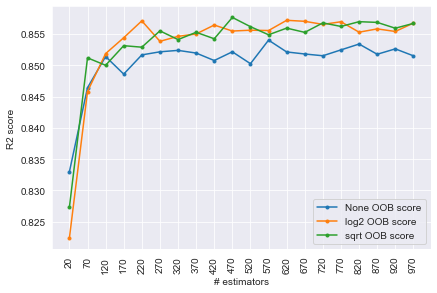

In [10]:
plt.plot(oob_score_none, '.-', label='None OOB score');
plt.plot(oob_score_log2, '.-', label='log2 OOB score');
plt.plot(oob_score_sqrt, '.-', label='sqrt OOB score');
plt.xticks(range(len(n_estimators)), n_estimators, rotation = 90)
plt.tight_layout();
plt.xlabel("# estimators")
plt.ylabel("R2 score")
plt.legend();

In [11]:
df_oobs = pd.DataFrame({"none": oob_score_none,
                       "log2":oob_score_log2,
                       "sqrt": oob_score_sqrt}, index=n_estimators)
display(df_oobs)
display(df_oobs.max())

none      log2      sqrt
20   0.832996  0.822393  0.827329
70   0.846432  0.845821  0.851210
120  0.851421  0.851890  0.850022
170  0.848613  0.854429  0.853156
220  0.851682  0.857126  0.852915
270  0.852176  0.853855  0.855526
320  0.852405  0.854648  0.854130
370  0.851977  0.855035  0.855298
420  0.850782  0.856456  0.854262
470  0.852177  0.855498  0.857675
520  0.850277  0.855632  0.856197
570  0.854042  0.855581  0.854900
620  0.852154  0.857215  0.855965
670  0.851827  0.857055  0.855286
720  0.851545  0.856559  0.856801
770  0.852484  0.856984  0.856233
820  0.853417  0.855316  0.856995
870  0.851786  0.855842  0.856882
920  0.852646  0.855431  0.855951
970  0.851534  0.856767  0.856721

none    0.854042
log2    0.857215
sqrt    0.857675
dtype: float64

In [12]:
maximo_log2 = max(oob_score_log2)

n_estimator = oob_score_log2.index(maximo_log2)
print('El mejor estimador es estimador  {}'.format(n_estimator))

El mejor estimador es estimador  12


### Comentarios:

Los mejores features son log2 y sqrt, ya que presentan valores relativamente mas altos en el OOB error. Los mejores parametros son log2, con el mejor estimado siendo 12.

## Ejercicio 5: Refactorice el modelo

- En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

In [13]:
random_best = RandomForestRegressor(n_estimators=17, max_features='log2',oob_score=True).fit(X_train, y_train)

In [14]:
report_cont_metrics(random_best, y_test, X_test)

R2 0.826632946770398
RMSE 0.1721662211777298
MAE 0.0771359889108929


### Comentarios:
- Mejoró su desempeño con respecto a los modelos anteriores. Disminuyeron los valores de RMSE y MAE, aunque R2 solo aumento en un par de milésimas.